# Preparing stuff

/Users/karen/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


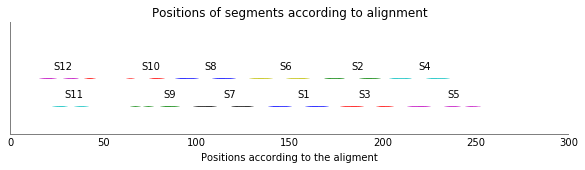

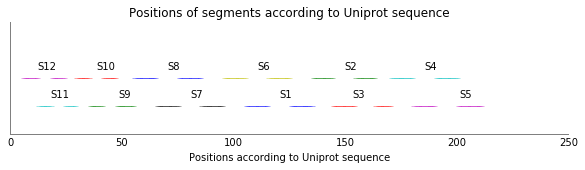

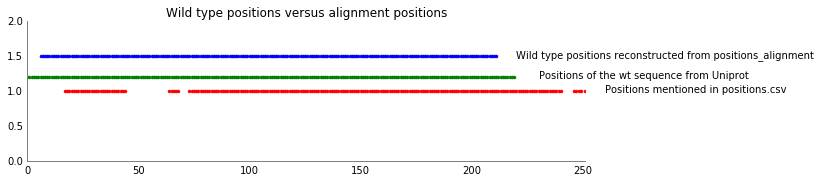

In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
from collections import OrderedDict
import ast
import Bio.PDB
from Bio import SeqIO
from IPython.display import display
%matplotlib inline
%run 'functions_dump.py'
%run 'ks01_Data_import.ipynb'
notebook_prefix = 'ks03'
image_counter = Counter()

## Fitness overview

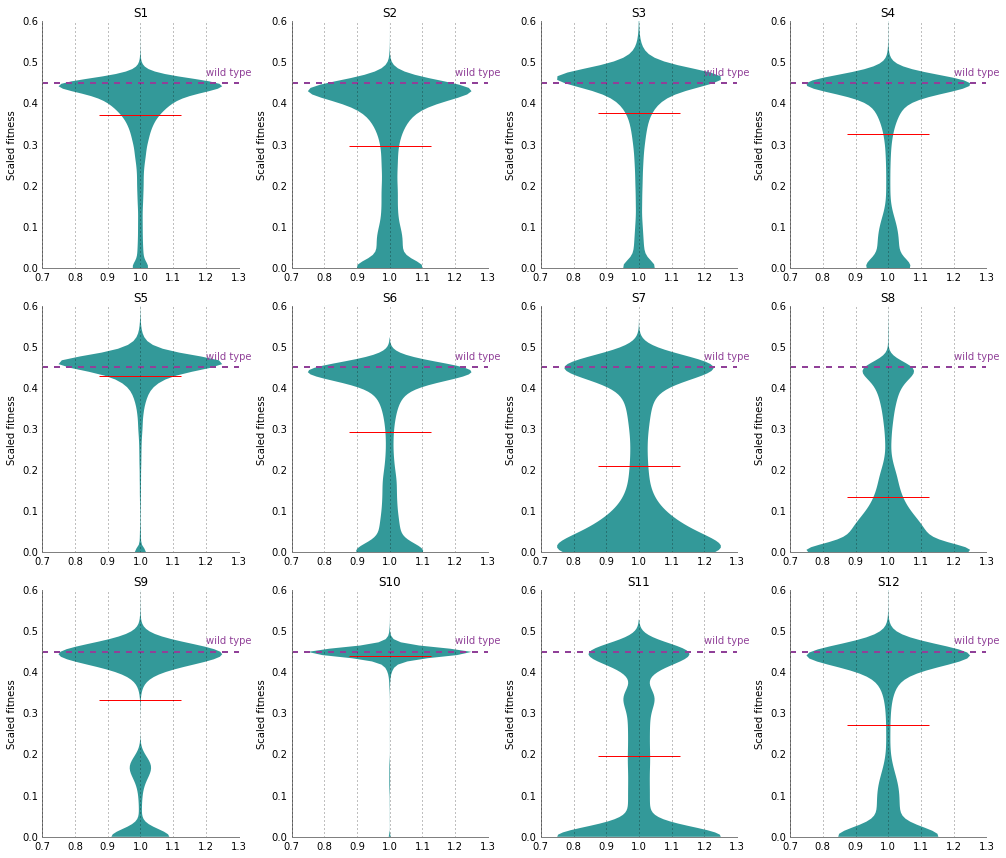

In [22]:
plot_better(width=14, height=12)
title = 'Distribution of mutants with different number of mutations'
facecolor = '#008080'
edgecolor = 'none'
wt_color = '#904098'
for index, item in enumerate(data.items()):
    segment_name, segment = item
    ax = plt.subplot(3,4,index+1)
    plt.title(segment_name.split('_')[0])
    mutant_distribution = np.array([len(segment[segment.mut_list.str.count(':') == mut_number-1]) for mut_number in range(1,13)])
    width = 1

    vplot = plt.violinplot(segment.s.values, showmeans=True, showmedians=False, showextrema=False)
    for patch in vplot['bodies']:
        patch.set_facecolor(facecolor)
        patch.set_alpha(0.8)
        patch.set_edgecolor(edgecolor)
    plt.axhline(0.45, ls='--', color=wt_color, lw=2)
    plt.text(1.2, 0.47, 'wild type', color=wt_color, fontsize=10)
    improve_plot(ax, grid='x')
    plt.ylabel('Scaled fitness')
    plt.ylim(0,0.6)
# plt.suptitle(title, fontsize=18)
plt.tight_layout()
save_image(image_counter, title, figures_folder, notebook_prefix)

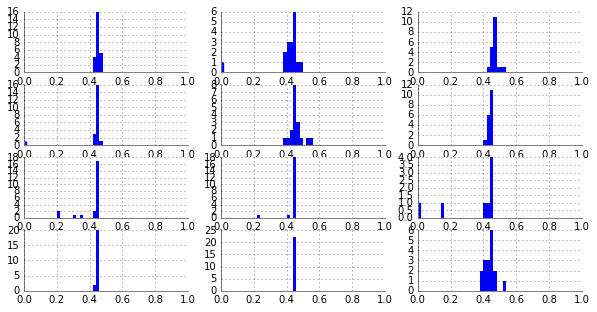

In [3]:
plot_better()
data_singles = OrderedDict()
counter = 1
for segment_name, segment_data in data.items():
    data_singles[segment_name] = segment_data[segment_data.mut_list.str.count(':') == 0]
#     display(data_singles[segment_name][['aa_seq', 'mut_list', 's']])
    ax = plt.subplot(4,3,counter)
    plt.hist(data_singles[segment_name].s.values, edgecolor='none', range=(0,1), bins=50)
    improve_plot(ax)
    counter += 1